In [1]:
from east import EastTextDetector
import cv2

detect = EastTextDetector(
    model_path="/home/ubuntu/practice/second/textdetection/frozen_east_text_detection.pb"
)

In [5]:
image = cv2.imread("photo.jpg")

In [6]:
h, w, c = image.shape
image = cv2.resize(image, (h, w))
boxes = detect.run(image)
print(boxes)

[[294  84 449 121]
 [ 77  81 274 120]
 [276 242 315 256]]


In [7]:
detect.calc_coverage(boxes, h, w)

4.151010701545778

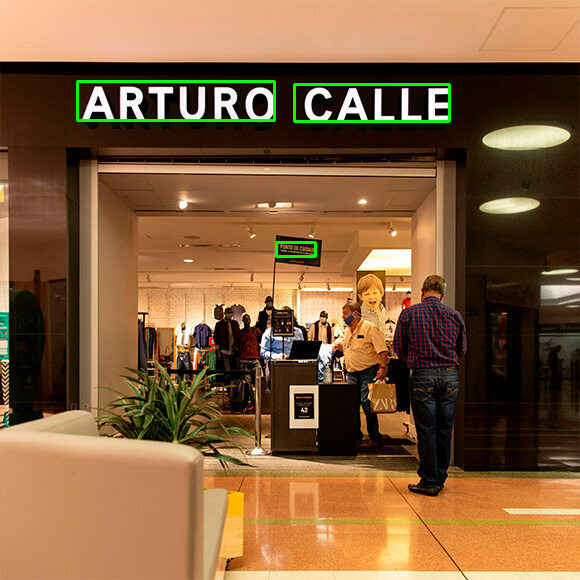

In [9]:
from PIL import Image

rW = 1
rH = 1
for (startX, startY, endX, endY) in boxes:
	# scale the bounding box coordinates based on the respective
	# ratios
	startX = int(startX * rW)
	startY = int(startY * rH)
	endX = int(endX * rW)
	endY = int(endY * rH)
	# draw the bounding box on the image
	cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)

display(Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)))